# Process the observational data sets

Data sets are merged if possible and harmonized to use the same units.

WDdM_literature2010paper.dat + WDdM_sdsscat.dat -> WDdM_processed.csv

## WD+dM binaries

In [ ]:
import pandas as pd
import seaborn as sns
import pylab as pl
import numpy as np

In [ ]:
names = ['name', 'period', 'M2', 'M2_e', 'Mwd', 'Mwd_e']
WDdM_lit = pd.read_csv('observations/WDdM_literature2010paper.dat', sep='\s+', names=names, skiprows=[0])

names = ['id', 'name', 'period', 'period_e', 'M2', 'M2_e', 'Mwd', 'Mwd_e']
WDdM_sdss = pd.read_csv('observations/WDdM_sdsscat.dat', sep='\s+', names=names, na_values=['-'], skiprows=[0])

In [ ]:
# add artifical 5% error on the period
WDdM_lit['period_e'] = WDdM_lit['period'] / 20

# drop the id collumn
WDdM_sdss.drop('id', axis=1, inplace=True)

# convert period to days
WDdM_sdss['period'] = WDdM_sdss['period'] / 24.
WDdM_sdss['period_e'] = WDdM_sdss['period'] / 24.

# add source indicator
WDdM_lit['source'] = 'lit'
WDdM_sdss['source'] = 'sdss'

In [ ]:
WDdM = pd.concat([WDdM_lit, WDdM_sdss])
WDdM.reset_index(inplace=True, drop=True)

The wite dwarfs span a large mass range, much larger than the sdBs from low mass progenitors could provide. So here we limit the WDs to masses between 0.35 and 0.55 Msol. 

In [ ]:
WDdM = WDdM[(WDdM['Mwd'] >= 0.35) & (WDdM['Mwd'] < 0.55)]

<AxesSubplot:xlabel='M2', ylabel='Count'>

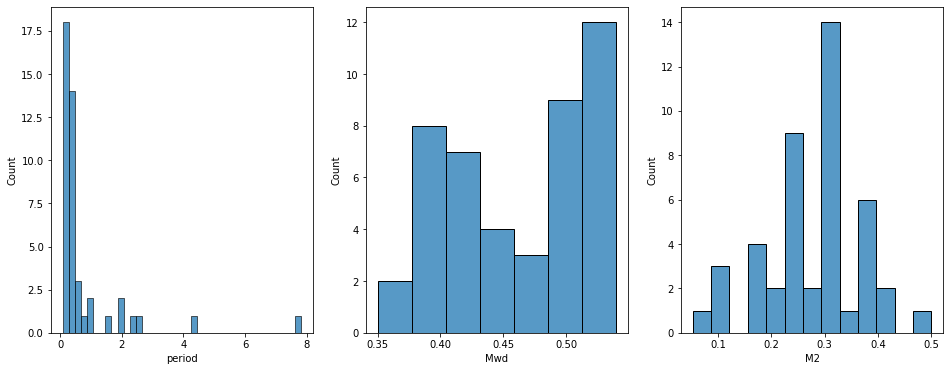

In [ ]:
pl.figure(figsize=(16, 6))
pl.subplot(131)
sns.histplot(WDdM['period'])
pl.subplot(132)
sns.histplot(WDdM['Mwd'])
pl.subplot(133)
sns.histplot(WDdM['M2'])

In [ ]:
WDdM.to_csv('observations/WDdM_processed.csv', index=False)

## sdB+dM binaries

In [ ]:
sdBdM = pd.read_csv('observations/Observingsamples-sdB+dM.csv', skiprows=[59], na_values=['None'])

In [ ]:
# drop a bunch of unused collumns
sdBdM.drop(['Old name', 'V* name', 'TIC', 'G', 'Plx', 'SED+', 'Spec', 'Notes', 'Ref', 'Teff_1', 'R_1', 'Teff_2', 'R_2'], axis=1, inplace=True)

# extract floating point values from the K1 collumn and call the rest NaN
def convert_float(val):
    if val != 'N' and val != 'S' and val != 'EQ':
        return float(val)
    else:
        np.nan 
sdBdM['K1'] = sdBdM['K1'].apply(convert_float)

# rename the period and name collumn
sdBdM.rename(columns={'P [d]': 'period', 'Jname': 'name', 'log g': 'logg'}, inplace=True)

In [ ]:
sdBdM

,name,period,A,K1,Teff,logg
0,J18330+4637,0.0707,0.050,NaN,NaN,NaN
1,J10202-0853,0.0730,0.038,51.0,30300.0,5.61
2,J23065+4418,0.0879,0.170,NaN,NaN,NaN
3,J03289+5035,0.1102,0.070,64.0,28500.0,5.50
4,J05101+3006,0.1145,0.252,NaN,NaN,NaN
...,...,...,...,...,...,...
80,J07534+7224,0.2083,0.151,NaN,30800.0,5.46
81,J05317-6953,0.2615,0.033,39.2,42000.0,5.46
82,J08084+3202,0.3697,0.086,NaN,NaN,NaN
83,J02413-6855,0.4607,0.033,NaN,NaN,NaN


<AxesSubplot:xlabel='logg', ylabel='Count'>

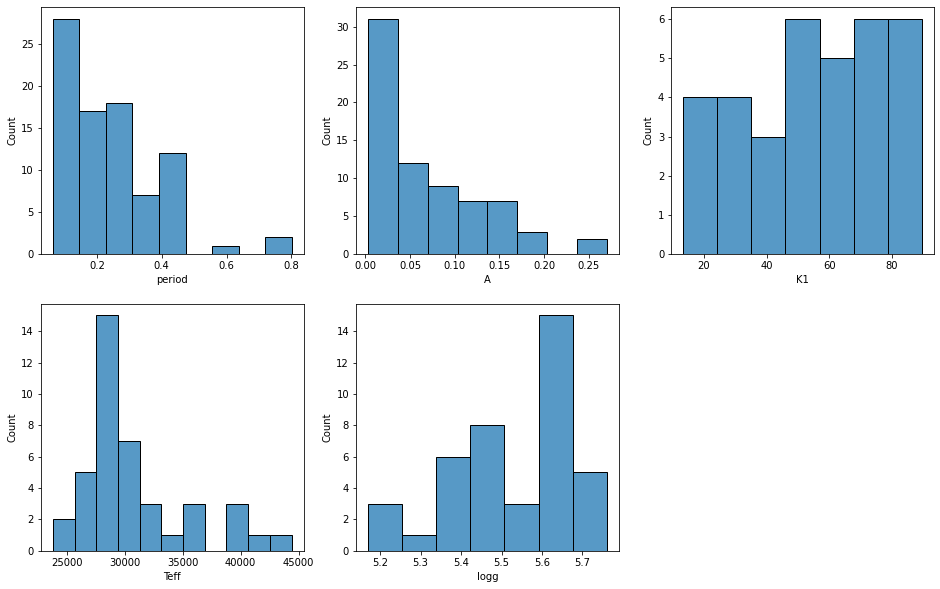

In [ ]:
pl.figure(figsize=(16, 10))
pl.subplot(231)
sns.histplot(sdBdM['period'])
pl.subplot(232)
sns.histplot(sdBdM['A'])
pl.subplot(233)
sns.histplot(sdBdM['K1'])
pl.subplot(234)
sns.histplot(sdBdM['Teff'])
pl.subplot(235)
sns.histplot(sdBdM['logg'])

In [ ]:
sdBdM.to_csv('observations/sdBdM_processed.csv', index=False)

In [ ]:
sdBdM['period'].median()

0.209